# Centrality

In [1]:
import geopandas as gpd

blocks_gdf = gpd.read_parquet('./../data/blocks.parquet')[['geometry', 'site_area', 'population']]
blocks_gdf.head()

,geometry,site_area,population
id,,,
0,"POLYGON ((354918.622 6625258.829, 354901.464 6...",8.044667e+05,606
1,"POLYGON ((355412.142 6623378.149, 355411.7 662...",2.317313e+04,41
2,"POLYGON ((353934.329 6625429.433, 353923.453 6...",3.630058e+05,14
3,"POLYGON ((355099.099 6623847.765, 355074.808 6...",1.964145e+05,581
4,"POLYGON ((352766.168 6621954.748, 352744.412 6...",1.781752e+06,2004


In [3]:
from blocksnet.relations import generate_adjacency_graph

adjacency_graph = generate_adjacency_graph(blocks_gdf)

2025-03-26 20:22:16.809 | INFO     | blocksnet.relations.adjacency.core:_generate_adjacency_nodes:10 - Generating nodes.
2025-03-26 20:22:16.816 | INFO     | blocksnet.relations.adjacency.core:_generate_adjacency_edges:15 - Generating edges.
2025-03-26 20:22:17.372 | SUCCESS  | blocksnet.relations.adjacency.core:generate_adjacency_graph:34 - Adjacency graph successfully generated: 16320 nodes, 15920 edges


## Population centrality

In [4]:
from blocksnet.analysis.centrality import population_centrality

centrality_df = population_centrality(blocks_gdf, adjacency_graph)
centrality_df.head()

,population,degree_centrality,population_normalized,degree_centrality_normalized,population_centrality
id,,,,,
0,606,0.000061,1.019320,1.034483,0.026685
1,41,0.000306,1.001307,1.172414,0.085219
2,14,0.000123,1.000446,1.068966,0.034021
3,581,0.000061,1.018523,1.034483,0.026281
4,2004,0.000613,1.063889,1.344828,0.211031


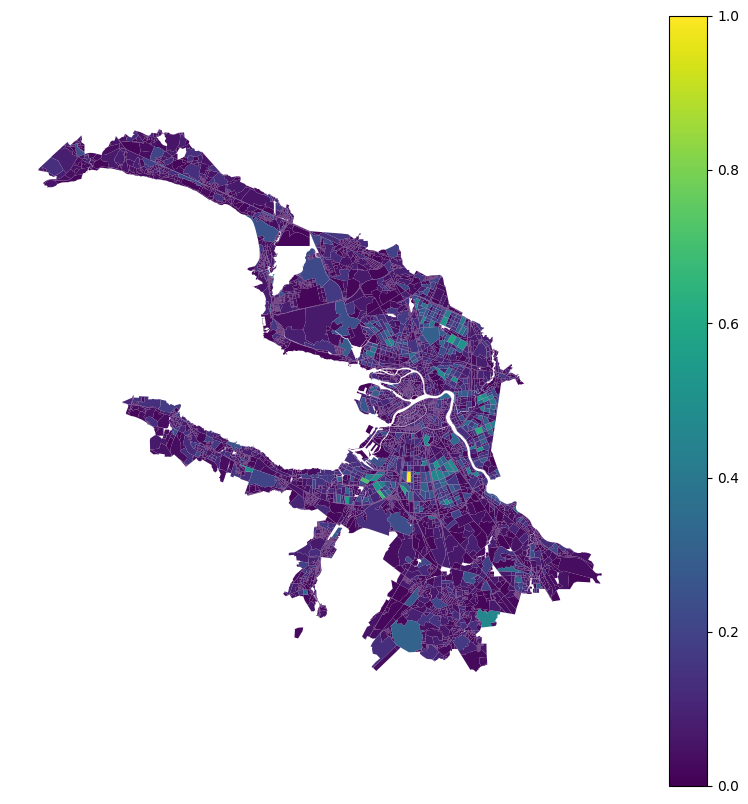

In [5]:
blocks_gdf[['geometry']].join(centrality_df).plot('population_centrality', legend=True, figsize=(10, 10)).set_axis_off()

## Services centrality

In [1]:
import pandas as pd

accessibility_matrix = pd.read_pickle('./../data/saint_petersburg/accessibility_matrix_intermodal.pickle')
accessibility_matrix.head()

/home/vasilstar/masterplanning/.venv/lib/python3.10/site-packages/pandas/io/formats/format.py:1458: RuntimeWarning: overflow encountered in cast
  has_large_values = (abs_vals > 1e6).any()


,0,1,2,3,4,5,6,7,8,9,...,9523,9524,9525,9526,9527,9528,9529,9530,9531,9532
0,0.0000,58.15625,74.187500,76.937500,66.8125,80.5000,92.18750,66.56250,65.68750,106.875,...,70.0000,72.1875,72.0000,73.3125,73.2500,74.0000,75.5000,83.1875,75.000,73.2500
1,56.2500,0.00000,99.687500,102.375000,88.1250,76.1250,113.43750,89.43750,88.56250,96.250,...,65.6250,67.7500,67.6250,68.9375,68.8750,69.6250,71.1250,78.8125,70.625,68.8750
2,74.5000,96.50000,0.000000,5.347656,74.0000,118.8125,92.06250,64.43750,63.56250,134.500,...,108.3125,110.4375,110.3750,111.6875,111.5625,112.3750,113.8125,121.5000,113.375,111.5625
3,77.2500,99.25000,5.347656,0.000000,76.7500,121.5625,90.12500,67.18750,66.31250,137.250,...,111.0625,113.1875,113.0625,114.3750,114.3125,115.0625,116.5625,124.2500,116.125,114.3125
4,70.1875,90.56250,82.375000,85.125000,0.0000,110.5000,35.53125,45.15625,44.28125,89.875,...,100.0000,102.1250,102.0000,103.3125,103.2500,104.0000,105.5000,113.1875,105.000,103.2500


In [2]:
blocks_gdf = pd.read_pickle('./../data/saint_petersburg/blocks.pickle')
blocks_gdf.head(3)

,geometry,site_area,residential,business,recreation,industrial,transport,special,agriculture,land_use,...,capacity_prison,count_prison,capacity_landfill,count_landfill,capacity_plant_nursery,count_plant_nursery,capacity_greenhouse_complex,count_greenhouse_complex,capacity_warehouse,count_warehouse
0,"POLYGON ((349424.859 6631180.891, 349424.751 6...",0.032316,0.000,0.0,0.000000,0.0,1.000000,0.0,0.000000,LandUse.TRANSPORT,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,"POLYGON ((352083.617 6633950.146, 352240.448 6...",137101.088247,0.099,0.0,0.079912,0.0,0.401072,0.0,0.417018,LandUse.AGRICULTURE,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,"POLYGON ((346700.642 6618453.176, 346681.107 6...",95239.084434,1.000,0.0,0.000000,0.0,0.000000,0.0,0.000000,LandUse.RESIDENTIAL,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
from blocksnet.analysis.centrality import services_centrality

centrality_df = services_centrality(accessibility_matrix, blocks_gdf)
centrality_df.head()

2025-09-19 17:05:17.958 | INFO     | blocksnet.analysis.diversity.shannon.core:shannon_diversity:23 - Calculating Shannon diversity index
100%|██████████| 9533/9533 [00:04<00:00, 2297.41it/s]


,connectivity,diversity,density,services_centrality
0,0.009721,0.000000,0.000000,0.170247
1,0.009816,0.693147,0.000015,0.256964
2,0.007360,0.000000,0.000000,0.099913
3,0.007220,0.000000,0.000000,0.095758
4,0.008065,1.039721,0.000024,0.247039


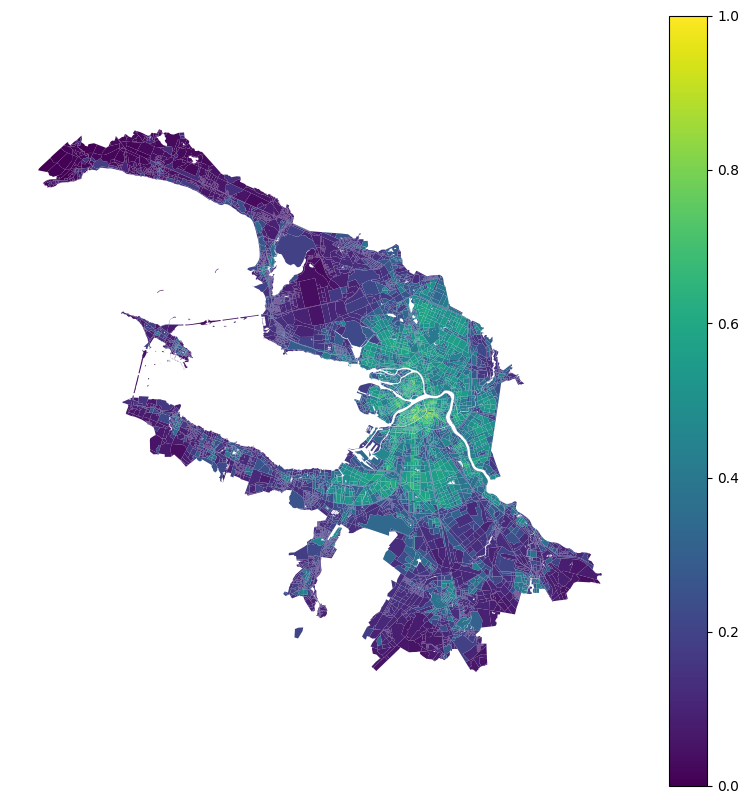

In [5]:
blocks_gdf[['geometry']].join(centrality_df).plot('services_centrality', legend=True, figsize=(10, 10), vmin=0, vmax=1).set_axis_off()